# Generate a world-wide grid, and the features for each point

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jusipy

In [3]:
GLCF = jusipy.latlong_features.GLCF(resolution='8km')
CLL = jusipy.GIS.CountryLatLong()

Loading GLCF(8km)                                                                                                    

## Generate the grid

In [4]:
# Generate the grid
land_grid = pd.DataFrame(jusipy.GIS.sample.grid_latlong(land=True, glcf=GLCF, lat_points=500),
                         columns=['lat', 'long'])

# Attach the country in which the point lies
land_grid_countries = CLL.get(list(land_grid.values))
land_grid['country'] = land_grid_countries

# Remove points without a country
land_grid_wrong = land_grid[pd.isna(land_grid.country)]
land_grid = land_grid[~pd.isna(land_grid.country)]



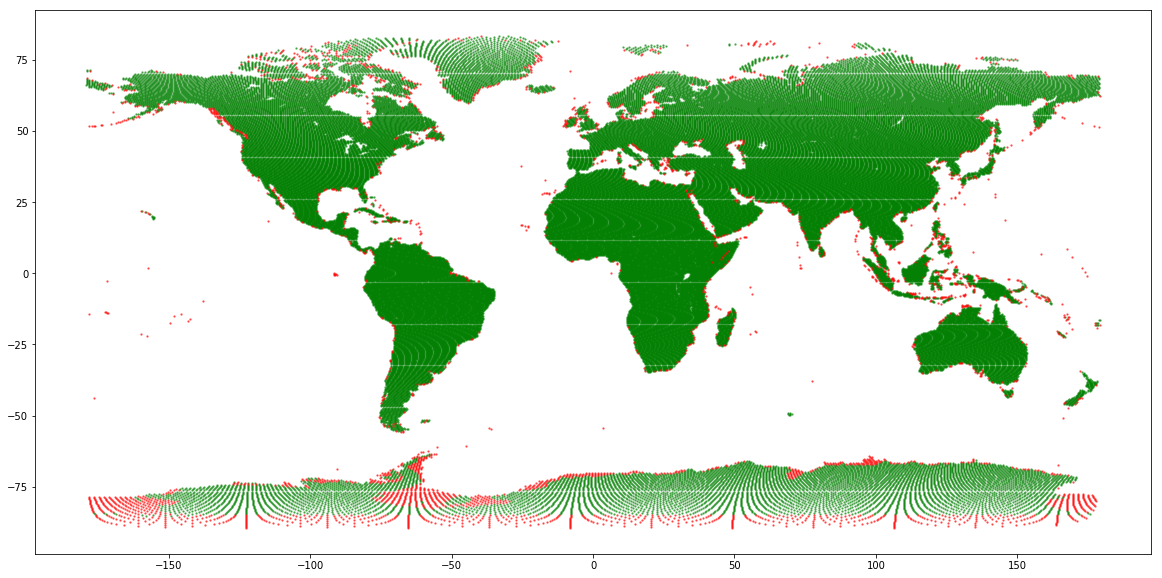

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=2, c='g', alpha=0.5, zorder=1)
plt.scatter(land_grid_wrong.long, land_grid_wrong.lat, s=2, c='r', alpha=0.5, zorder=2)

## Collect the features

In [6]:
# Load features
A_latlong = jusipy.latlong_features.All()
#A_country = jusipy.country_features.All()

# Get features for each point in grid
#country_features = jusipy.country_features.get(all_points, A_country)
latlong_features = jusipy.latlong_features.get(land_grid, A_latlong, pixel_window=10)

# Remove features we can't use...
latlong_features = latlong_features.drop(columns=['coding_error_do_not_use_feature'])

Loading GLCF(8km)                                                                                                     reas)                                                                                                    downloading
None


/Users/thiesgehrmann/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (3,17,25,26,28,34,35,37,39,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


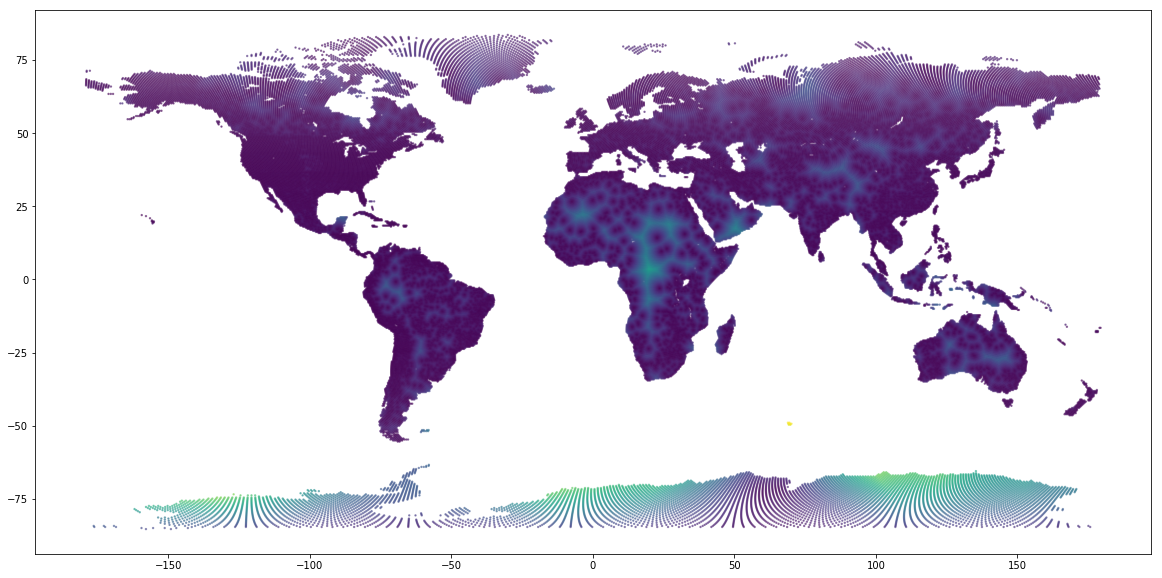

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=2, c=latlong_features.distance_to_mine.values, alpha=0.5)

## Store the grid and features

In [11]:
# Store the grid
land_grid.to_pickle('data/grid_500.pkl')
# Store the features
latlong_features.to_pickle('data/grid_500_latlong_features.pkl')

In [9]:
latlong_features.columns

Index(['nearest_airport', 'nearest_port', 'nearest_roads', 'nearest_railroad',
       'nearest_urban_area', 'Water', 'Broadleaf Evergreen Forest',
       'Coniferous Evergreen Forest and Woodland',
       'High latitude Deciduous Forest and Woodland', 'Tundra',
       'Mixed Coniferous Forest and Woodland', 'Wooded Grassland', 'Grassland',
       'Bare Ground', 'Shrubs and Bare Ground', 'Cultivated Crops',
       'Broadleaf Deciduous Forest and Woodland', 'Data Unavailable', 'Water2',
       'Evergreen Needleleaf Forest', 'Evergreen Broadleaf Forest',
       'Deciduous Needleleaf Forest', 'Deciduous Broadleaf Forest',
       'Mixed Forest', 'Woodland', 'Wooded Grassland2', 'Closed Shrubland',
       'Open Shrubland', 'Grassland2', 'Cropland', 'Bare Ground2',
       'Permanent snow and ice', 'distance_to_mine'],
      dtype='object')